# Feature Matching Using FLANN Based Matcher
(TUM Dataset)

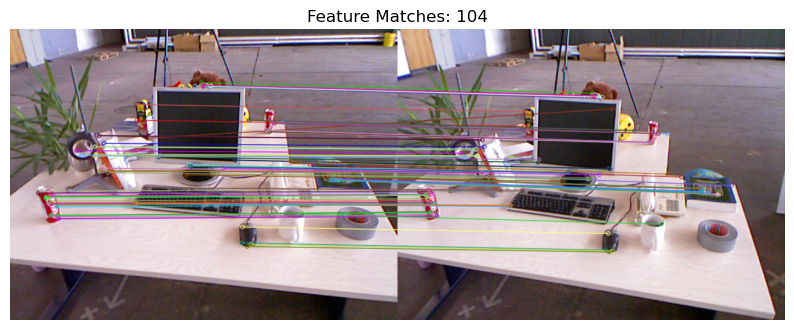

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_and_match_features(image_path1, image_path2):
    """
    Extract features using ORB and match them using FLANN. Display matched keypoints.

    Parameters:
        image_path1: Path to the first image.
        image_path2: Path to the second image.

    Returns:
        None
    """
    # Load images
    img1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
    img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)

    if img1 is None or img2 is None:
        print("Error loading images.")
        return

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect and compute features
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Use FLANN-based matcher
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    match_img = cv2.drawMatches(
        img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Convert the match image to RGB for matplotlib
    match_img = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(match_img)
    plt.title(f"Feature Matches: {len(good_matches)}")
    plt.axis('off')
    plt.show()

# Example usage
extract_and_match_features("1.png", "2.png")


# Pose Estimation on two Static Images 
(TUM Dataset)

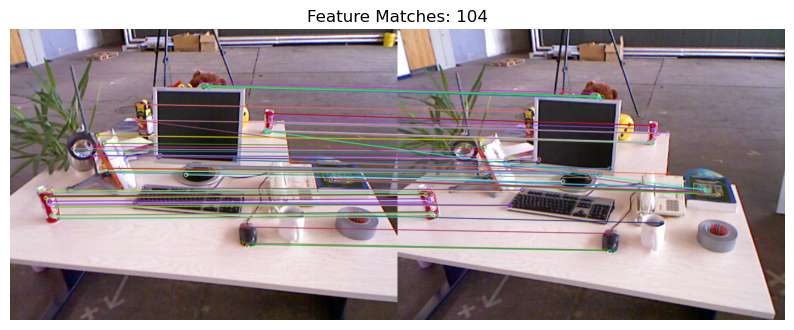

Number of good matches: 104
Essential Matrix:
[[ 0.01016864  0.25010598  0.04743967]
 [-0.2154487   0.0299287  -0.67161297]
 [-0.00783091  0.66058272  0.01686324]]
Rotation Matrix:
[[ 0.99735059 -0.05048403  0.05237518]
 [ 0.04902581  0.99838327  0.02876324]
 [-0.05374259 -0.0261193   0.99821316]]
Translation Vector:
[[-0.93283769]
 [-0.05695861]
 [ 0.35576616]]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_and_match_features(image_path1, image_path2):
    """
    Extract features using ORB and match them using FLANN. Display matched keypoints.

    Parameters:
        image_path1: Path to the first image.
        image_path2: Path to the second image.

    Returns:
        keypoints1, keypoints2, good_matches: Keypoints and matches for pose estimation.
    """
    # Load images
    img1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
    img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)

    if img1 is None or img2 is None:
        print("Error loading images.")
        return None, None, None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect and compute features
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Use FLANN-based matcher
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    match_img = cv2.drawMatches(
        img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Convert the match image to RGB for matplotlib
    match_img = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(match_img)
    plt.title(f"Feature Matches: {len(good_matches)}")
    plt.axis('off')
    plt.show()

    return keypoints1, keypoints2, good_matches

def pose_estimation_2d2d(keypoints1, keypoints2, matches, K):
    """
    Estimates the pose between two images using the matched keypoints.

    Parameters:
        keypoints1, keypoints2: Keypoints from the two images.
        matches: Matches between the keypoints.
        K: Intrinsic camera matrix.

    Returns:
        R, t: Rotation and translation matrices.
    """
    # Convert keypoints to Point2f format
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

    # Compute the Essential matrix
    focal_length = K[0, 0]
    principal_point = (K[0, 2], K[1, 2])
    essential_matrix, _ = cv2.findEssentialMat(points1, points2, focal=focal_length, pp=principal_point)

    # Recover pose from the Essential matrix
    _, R, t, _ = cv2.recoverPose(essential_matrix, points1, points2, K)

    print(f"Essential Matrix:\n{essential_matrix}")
    print(f"Rotation Matrix:\n{R}")
    print(f"Translation Vector:\n{t}")

    return R, t

def main():
    # Paths to input images
    image_path1 = "1.png"
    image_path2 = "2.png"

    # Camera intrinsic matrix (example values, replace with actual calibration data)
    K = np.array([
        [520.9, 0, 325.1],
        [0, 521.0, 249.7],
        [0, 0, 1]
    ])

    # Extract features and match them
    keypoints1, keypoints2, good_matches = extract_and_match_features(image_path1, image_path2)

    if keypoints1 is None or keypoints2 is None or good_matches is None:
        print("Feature extraction or matching failed.")
        return

    print(f"Number of good matches: {len(good_matches)}")

    # Estimate pose
    R, t = pose_estimation_2d2d(keypoints1, keypoints2, good_matches, K)

if __name__ == "__main__":
    main()


# Pose estimation on custom dataset

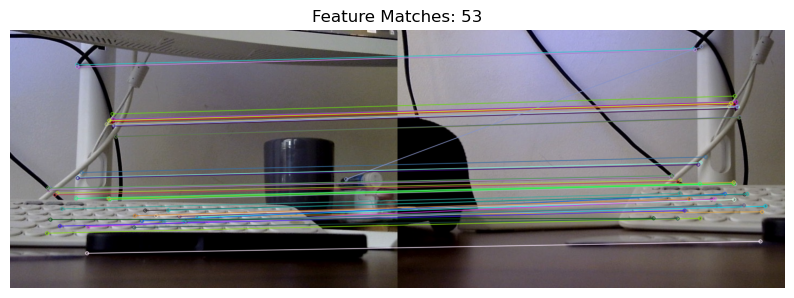

Number of good matches: 53
Essential Matrix:
[[ 0.0124343  -0.65959085  0.0719862 ]
 [ 0.70187545  0.03906534  0.05434462]
 [-0.06164843  0.24027883 -0.03098801]]
Rotation Matrix:
[[ 0.90659263  0.06263734  0.41733243]
 [-0.05283586  0.99798932 -0.03500998]
 [-0.41868624  0.00968967  0.90807926]]
Translation Vector:
[[-0.34526305]
 [-0.07604493]
 [-0.93542001]]


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_and_match_features(image_path1, image_path2):
    """
    Extract features using ORB and match them using FLANN. Display matched keypoints.

    Parameters:
        image_path1: Path to the first image.
        image_path2: Path to the second image.

    Returns:
        keypoints1, keypoints2, good_matches: Keypoints and matches for pose estimation.
    """
    # Load images
    img1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
    img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)

    if img1 is None or img2 is None:
        print("Error loading images.")
        return None, None, None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect and compute features
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Use FLANN-based matcher
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    match_img = cv2.drawMatches(
        img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Convert the match image to RGB for matplotlib
    match_img = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(match_img)
    plt.title(f"Feature Matches: {len(good_matches)}")
    plt.axis('off')
    plt.show()

    return keypoints1, keypoints2, good_matches

def pose_estimation_2d2d(keypoints1, keypoints2, matches, K):
    """
    Estimates the pose between two images using the matched keypoints.

    Parameters:
        keypoints1, keypoints2: Keypoints from the two images.
        matches: Matches between the keypoints.
        K: Intrinsic camera matrix.

    Returns:
        R, t: Rotation and translation matrices.
    """
    # Convert keypoints to Point2f format
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

    # Compute the Essential matrix
    focal_length = K[0, 0]
    principal_point = (K[0, 2], K[1, 2])
    essential_matrix, _ = cv2.findEssentialMat(points1, points2, focal=focal_length, pp=principal_point)

    # Recover pose from the Essential matrix
    _, R, t, _ = cv2.recoverPose(essential_matrix, points1, points2, K)

    print(f"Essential Matrix:\n{essential_matrix}")
    print(f"Rotation Matrix:\n{R}")
    print(f"Translation Vector:\n{t}")

    return R, t

def main():
    # Paths to input images
    image_path1 = "img1.jpg"
    image_path2 = "img2.jpg"

    # Camera intrinsic matrix (calibration data)
    K = np.array([
        [1003.107672, 0.000000, 325.584227],
        [0.000000, 1004.807912, 246.675649],
        [0.000000, 0.000000, 1.000000]
    ])

    # Distortion coefficients (not used in current pose estimation but available)
    distortion_coefficients = np.array([0.188663, 0.042106, 0.011154, 0.012947, 0.000000])

    # Extract features and match them
    keypoints1, keypoints2, good_matches = extract_and_match_features(image_path1, image_path2)

    if keypoints1 is None or keypoints2 is None or good_matches is None:
        print("Feature extraction or matching failed.")
        return

    print(f"Number of good matches: {len(good_matches)}")

    # Estimate pose
    R, t = pose_estimation_2d2d(keypoints1, keypoints2, good_matches, K)

if __name__ == "__main__":
    main()


# Current Error with ORB %

In [7]:
import numpy as np

# Rotation Matrix for 25 degrees (from earlier calculation)
R_calculated = np.array([
    [0.9063, 0.4226, 0],
    [-0.4226, 0.9063, 0],
    [0, 0, 1]
])

# Visual Odometry Rotation Matrix
R_vo = np.array([
    [0.90659263, 0.06263734, 0.41733243],
    [-0.05283586, 0.99798932, -0.03500998],
    [-0.41868624, 0.00968967, 0.90807926]
])

# Calculated Translation Vector (for 5 cm right)
t_calculated = np.array([1, 0, 0])

# Visual Odometry Translation Vector
t_vo = np.array([-0.34526305, -0.07604493, -0.93542001]).reshape(3)

# Compute Frobenius Norm for Rotation Matrices
rotation_error = np.linalg.norm(R_calculated - R_vo, ord='fro')
rotation_magnitude = np.linalg.norm(R_calculated, ord='fro')
rotation_error_percentage = (rotation_error / rotation_magnitude) * 100

# Compute Euclidean Norm for Translation Vectors
translation_error = np.linalg.norm(t_calculated - t_vo)
translation_magnitude = np.linalg.norm(t_calculated)
translation_error_percentage = (translation_error / translation_magnitude) * 100

# Print Results
print(f"Rotation Matrix Error Percentage: {rotation_error_percentage:.2f}%")
print(f"Translation Vector Error Percentage: {translation_error_percentage:.2f}%")


Rotation Matrix Error Percentage: 45.97%
Translation Vector Error Percentage: 164.03%


# Custom Data using SIFT

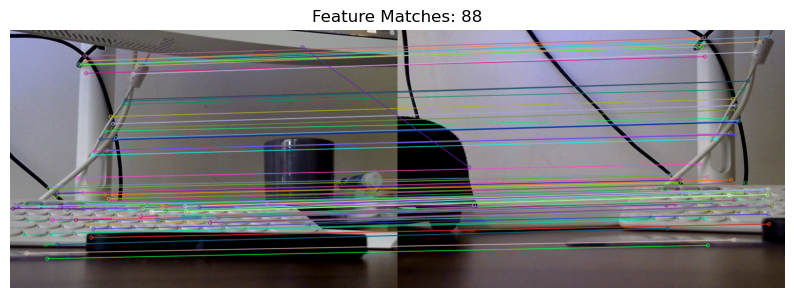

Number of good matches: 88
Essential Matrix:
[[-0.0031816   0.14879335 -0.00888868]
 [ 0.10115923 -0.02122042 -0.6995004 ]
 [-0.0174444   0.69063064 -0.02262999]]
Rotation Matrix:
[[ 0.93686151  0.04078065  0.34731463]
 [-0.03060707  0.99892793 -0.0347303 ]
 [-0.34835861  0.02190719  0.9371053 ]]
Translation Vector:
[[ 0.9775187 ]
 [-0.00560262]
 [-0.21077428]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_and_match_features(image_path1, image_path2):
    """
    Extract features using SIFT and match them using FLANN. Display matched keypoints.

    Parameters:
        image_path1: Path to the first image.
        image_path2: Path to the second image.

    Returns:
        keypoints1, keypoints2, good_matches: Keypoints and matches for pose estimation.
    """
    # Load images
    img1 = cv2.imread(image_path1, cv2.IMREAD_COLOR)
    img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)

    if img1 is None or img2 is None:
        print("Error loading images.")
        return None, None, None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect and compute features
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Use FLANN-based matcher with parameters suitable for SIFT
    index_params = dict(algorithm=1, trees=5)  # Using KDTree
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    match_img = cv2.drawMatches(
        img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    # Convert the match image to RGB for matplotlib
    match_img = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(match_img)
    plt.title(f"Feature Matches: {len(good_matches)}")
    plt.axis('off')
    plt.show()

    return keypoints1, keypoints2, good_matches

def pose_estimation_2d2d(keypoints1, keypoints2, matches, K):
    """
    Estimates the pose between two images using the matched keypoints.

    Parameters:
        keypoints1, keypoints2: Keypoints from the two images.
        matches: Matches between the keypoints.
        K: Intrinsic camera matrix.

    Returns:
        R, t: Rotation and translation matrices.
    """
    # Convert keypoints to Point2f format
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

    # Compute the Essential matrix
    focal_length = K[0, 0]
    principal_point = (K[0, 2], K[1, 2])
    essential_matrix, _ = cv2.findEssentialMat(points1, points2, focal=focal_length, pp=principal_point)

    # Recover pose from the Essential matrix
    _, R, t, _ = cv2.recoverPose(essential_matrix, points1, points2, K)

    print(f"Essential Matrix:\n{essential_matrix}")
    print(f"Rotation Matrix:\n{R}")
    print(f"Translation Vector:\n{t}")

    return R, t

def main():
    # Paths to input images
    image_path1 = "img1.jpg"
    image_path2 = "img2.jpg"

    # Camera intrinsic matrix (calibration data)
    K = np.array([
        [1003.107672, 0.000000, 325.584227],
        [0.000000, 1004.807912, 246.675649],
        [0.000000, 0.000000, 1.000000]
    ])

    # Extract features and match them
    keypoints1, keypoints2, good_matches = extract_and_match_features(image_path1, image_path2)

    if keypoints1 is None or keypoints2 is None or good_matches is None:
        print("Feature extraction or matching failed.")
        return

    print(f"Number of good matches: {len(good_matches)}")

    # Estimate pose
    R, t = pose_estimation_2d2d(keypoints1, keypoints2, good_matches, K)

if __name__ == "__main__":
    main()


# Error % with SIFT 

In [3]:
import numpy as np

# Given Rotation Matrices
R_calculated = np.array([
    [0.9063, 0.4226, 0],
    [-0.4226, 0.9063, 0],
    [0, 0, 1]
])

R_vo_new = np.array([
    [0.93686151, 0.04078065, 0.34731463],
    [-0.03060707, 0.99892793, -0.0347303],
    [-0.34835861, 0.02190719, 0.9371053]
])

# Given Translation Vectors
t_calculated = np.array([1, 0, 0])

t_vo_new = np.array([0.9775187, -0.00560262, -0.21077428]).reshape(3)

# Compute Frobenius Norm for Rotation Matrices
rotation_error_new = np.linalg.norm(R_calculated - R_vo_new, ord='fro')
rotation_magnitude_new = np.linalg.norm(R_calculated, ord='fro')
rotation_error_percentage_new = (rotation_error_new / rotation_magnitude_new) * 100

# Compute Euclidean Norm for Translation Vectors
translation_error_new = np.linalg.norm(t_calculated - t_vo_new)
translation_magnitude_new = np.linalg.norm(t_calculated)
translation_error_percentage_new = (translation_error_new / translation_magnitude_new) * 100

# Display Results
print("Rotation Error: ",rotation_error_percentage_new)
print("Translation error: ",translation_error_percentage_new)


Rotation Error:  43.07328687858825
Translation error:  21.2043852327939
